In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/current-best-v2/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

102853 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

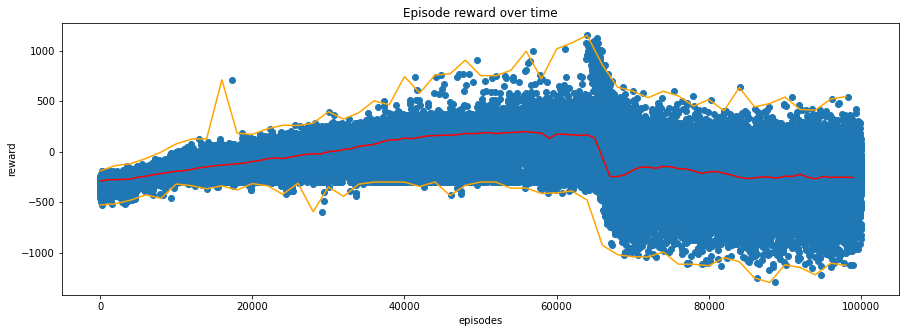

Maximum: 1152.0999999999997
Average: -69.27093800000036
Moving Average (simple): {0: -290.7, 1000: -276.8, 2000: -276.6, 3000: -274.1, 4000: -270.3, 5000: -251.1, 6000: -242.7, 7000: -226.7, 8000: -216.3, 9000: -204.4, 10000: -192.4, 11000: -187.6, 12000: -176.5, 13000: -159.5, 14000: -150.1, 15000: -138.8, 16000: -133.0, 17000: -125.6, 18000: -119.3, 19000: -111.3, 20000: -97.2, 21000: -87.1, 22000: -69.0, 23000: -62.1, 24000: -67.5, 25000: -53.3, 26000: -38.6, 27000: -26.7, 28000: -20.5, 29000: -21.8, 30000: 0.0, 31000: 6.5, 32000: 22.4, 33000: 29.0, 34000: 54.5, 35000: 62.0, 36000: 73.7, 37000: 96.2, 38000: 117.1, 39000: 117.1, 40000: 134.3, 41000: 129.3, 42000: 143.2, 43000: 157.0, 44000: 159.4, 45000: 163.9, 46000: 163.6, 47000: 169.3, 48000: 181.3, 49000: 178.4, 50000: 184.5, 51000: 190.6, 52000: 179.1, 53000: 187.5, 54000: 189.4, 55000: 195.5, 56000: 198.6, 57000: 190.8, 58000: 184.9, 59000: 131.8, 60000: 173.5, 61000: 172.9, 62000: 167.5, 63000: 162.1, 64000: 167.9, 65000: 136.

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

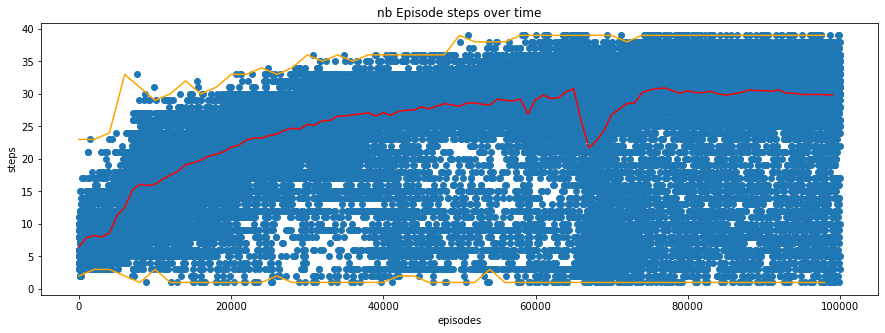

Maximum: 39
Average: 25.30133
Moving Average (simple): {0: 6.5, 1000: 7.9, 2000: 8.2, 3000: 8.0, 4000: 8.6, 5000: 11.3, 6000: 12.5, 7000: 15.2, 8000: 16.1, 9000: 15.9, 10000: 16.1, 11000: 16.9, 12000: 17.5, 13000: 18.1, 14000: 19.1, 15000: 19.4, 16000: 19.8, 17000: 20.4, 18000: 20.7, 19000: 21.1, 20000: 21.8, 21000: 22.1, 22000: 22.9, 23000: 23.2, 24000: 23.2, 25000: 23.6, 26000: 23.8, 27000: 24.4, 28000: 24.7, 29000: 24.6, 30000: 25.3, 31000: 25.2, 32000: 25.9, 33000: 25.9, 34000: 26.6, 35000: 26.6, 36000: 26.8, 37000: 26.9, 38000: 27.1, 39000: 26.6, 40000: 27.1, 41000: 26.7, 42000: 27.3, 43000: 27.5, 44000: 27.5, 45000: 28.0, 46000: 27.7, 47000: 28.1, 48000: 28.5, 49000: 28.3, 50000: 28.1, 51000: 28.6, 52000: 28.6, 53000: 28.4, 54000: 28.3, 55000: 29.2, 56000: 29.0, 57000: 28.9, 58000: 29.2, 59000: 26.9, 60000: 29.1, 61000: 29.8, 62000: 29.3, 63000: 29.4, 64000: 30.3, 65000: 30.8, 66000: 25.9, 67000: 21.7, 68000: 22.8, 69000: 24.4, 70000: 26.8, 71000: 27.7, 72000: 28.5, 73000: 28.6, 

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

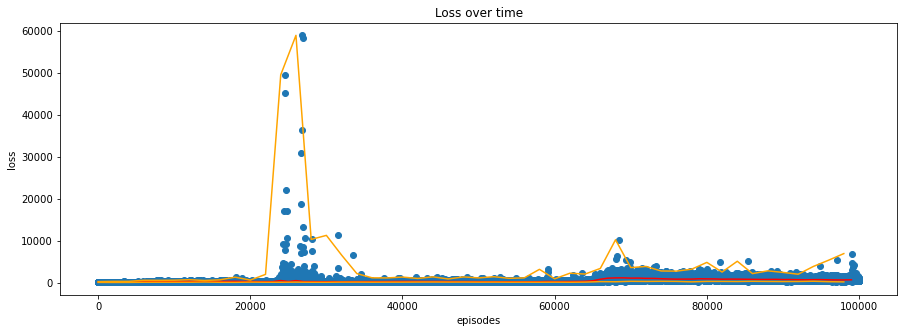

Maximum: 58856.91796875
Average: 431.79323921554567
Moving Average (simple): {0: 89.3, 1000: 94.4, 2000: 90.8, 3000: 88.6, 4000: 73.0, 5000: 133.7, 6000: 165.8, 7000: 249.0, 8000: 262.7, 9000: 234.5, 10000: 218.0, 11000: 280.1, 12000: 293.5, 13000: 285.9, 14000: 287.1, 15000: 266.8, 16000: 292.1, 17000: 282.4, 18000: 291.1, 19000: 258.4, 20000: 265.2, 21000: 227.3, 22000: 219.1, 23000: 221.5, 24000: 472.7, 25000: 228.2, 26000: 458.6, 27000: 227.4, 28000: 221.1, 29000: 203.5, 30000: 191.4, 31000: 218.3, 32000: 191.7, 33000: 212.6, 34000: 215.6, 35000: 219.0, 36000: 224.7, 37000: 223.2, 38000: 235.0, 39000: 254.8, 40000: 259.1, 41000: 262.1, 42000: 266.9, 43000: 251.9, 44000: 254.8, 45000: 251.1, 46000: 240.9, 47000: 235.4, 48000: 230.9, 49000: 224.0, 50000: 210.0, 51000: 193.6, 52000: 199.9, 53000: 193.7, 54000: 197.3, 55000: 180.7, 56000: 185.7, 57000: 189.0, 58000: 199.3, 59000: 247.2, 60000: 213.9, 61000: 230.1, 62000: 234.9, 63000: 253.9, 64000: 285.1, 65000: 422.1, 66000: 787.9, 67

In [7]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")